# Importing Libraries

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import hashlib
import random

# Importing Image Data And Creating DataFrame

In [3]:
data_dir = "C:/Users/ASUS/food classification using CNN/food/food"

# Get a list of all folders
folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

# Create a dictionary to store the counts of images in each folder
data = {'folder': [], 'count': []}

# Iterate through each folder and count the number of images
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    files = glob.glob(os.path.join(folder_path, '*.jpg'))  # Assuming images are in jpg format
    data['folder'].append(folder)
    data['count'].append(len(files))

# Create a DataFrame for better analysis
df = pd.DataFrame(data)

# Exploratory Data Analysis(EDA)

EDA is the process of acquiring knowledge and insights from the data sets by the help of proper analysis and summarization

In [15]:
print(df.describe())

            count
count  106.000000
mean   515.226415
std    155.449473
min     79.000000
25%    490.500000
50%    600.000000
75%    600.000000
max    604.000000


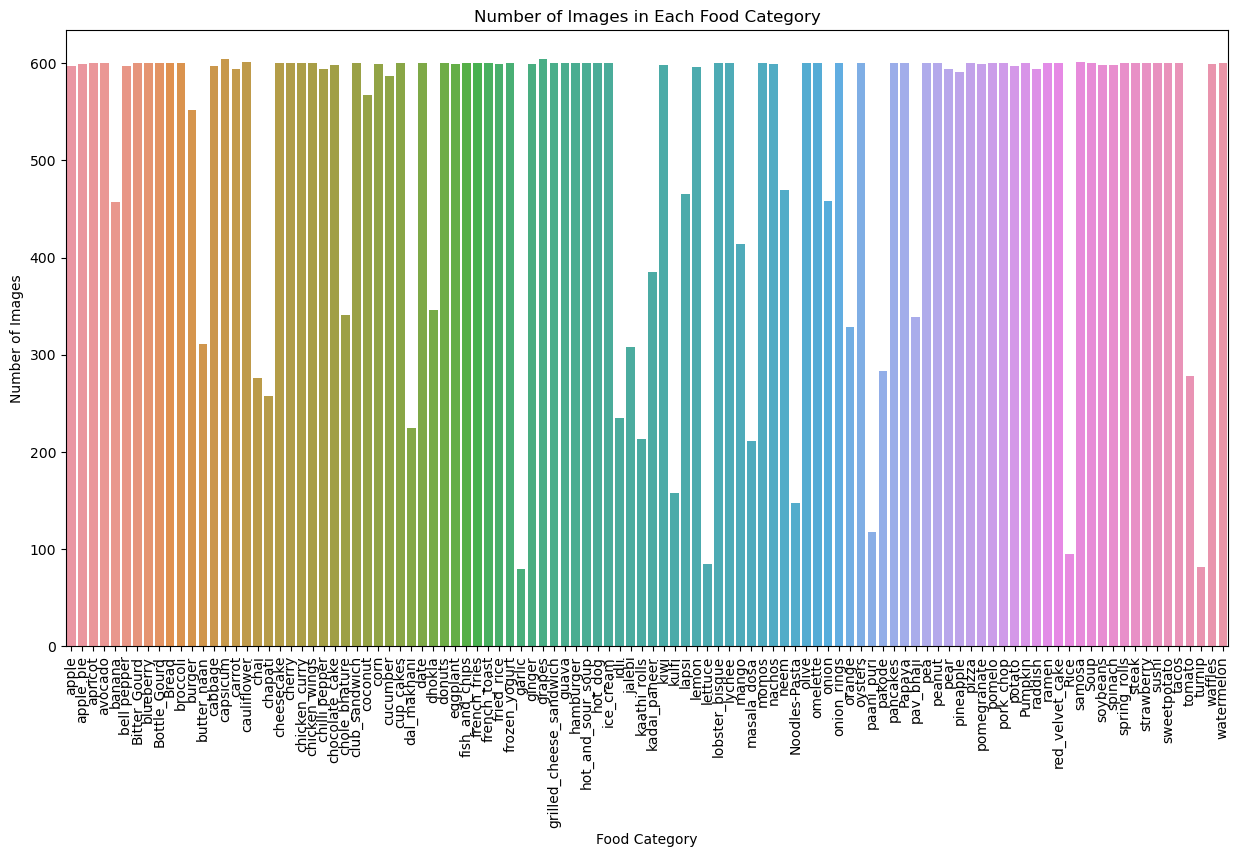

In [17]:
# Bar plot of the number of images in each folder
plt.figure(figsize=(15, 8))
sns.barplot(x='folder', y='count', data=df)
plt.xticks(rotation=90)
plt.xlabel('Food Category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Food Category')
plt.show()

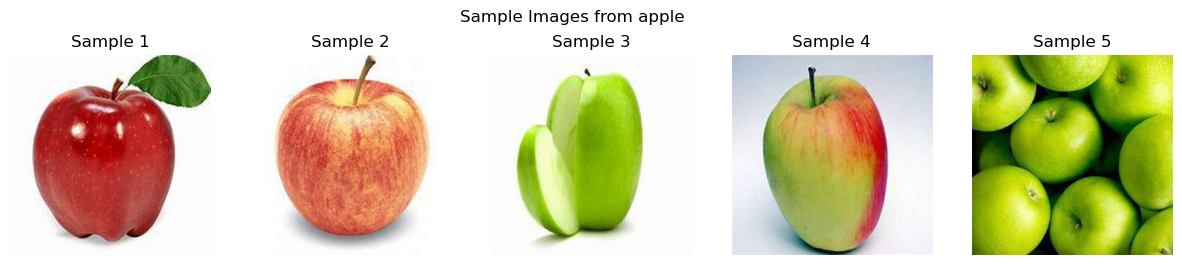

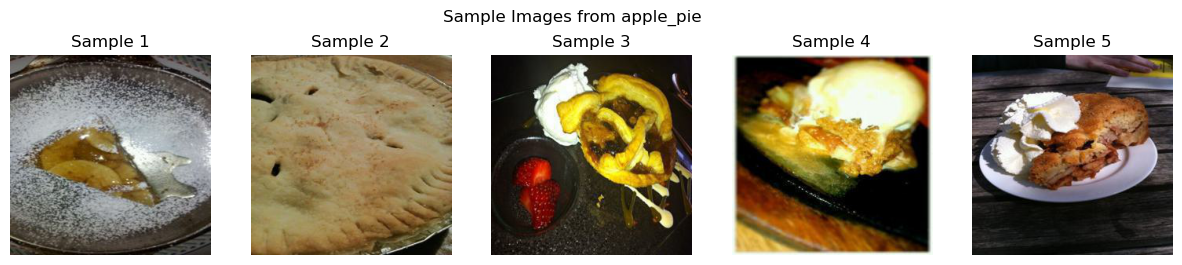

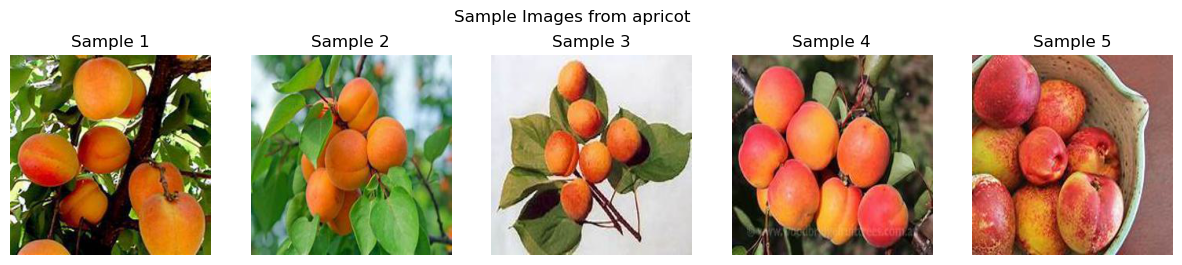

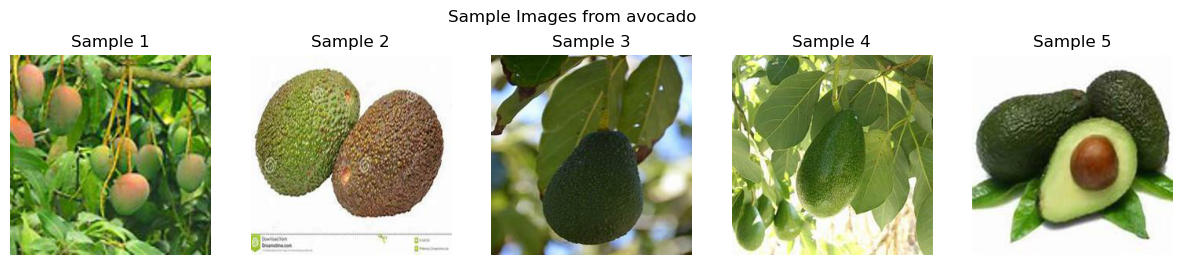

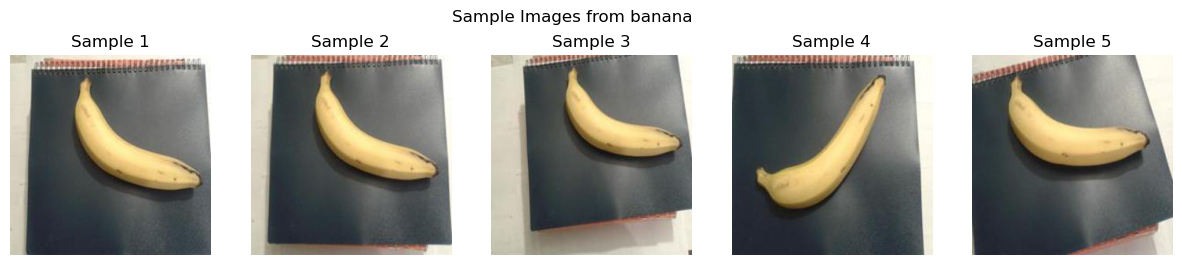

In [19]:
# Display sample images from a few folders
num_sample_images = 5

for folder in folders[:5]:
    folder_path = os.path.join(data_dir, folder)
    files = glob.glob(os.path.join(folder_path, '*.jpg'))[:num_sample_images]

    plt.figure(figsize=(15, 3))
    for i, file in enumerate(files):
        plt.subplot(1, num_sample_images, i + 1)
        img = Image.open(file)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Sample {i + 1}')

    plt.suptitle(f'Sample Images from {folder}')
    plt.show()

In [8]:
# Initialize a list to store folder names with less than 200 images
folders_with_few_images = []

# Loop through each folder in the dataset
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Count the number of images in the folder
        num_images = len([f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')])  # Update file extensions as needed
        
        # Check if the number of images is less than 200
        if num_images < 200:
            folders_with_few_images.append(folder_name)

# Print the folders with less than 600 images
print("Folders with less than 500 images:")
for folder_name in folders_with_few_images:
    print(folder_name)

Folders with less than 500 images:
garlic
kulfi
lettuce
Noodles-Pasta
paani_puri
Rice
turnip


In [23]:
def remove_duplicates(folder_path):
    """
    Remove duplicate images within a folder based on hash comparison.
    """
    image_hashes = set()

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the file is an image
        if file_path.endswith(('.jpg', '.png')):
            # Calculate the hash of the image
            with open(file_path, 'rb') as f:
                image_hash = hashlib.md5(f.read()).hexdigest()

            # If the hash is already seen, remove the duplicate image
            if image_hash in image_hashes:
                print(f"Removing duplicate image: {file_path}")
                os.remove(file_path)
            else:
                image_hashes.add(image_hash)

def remove_excess_images(folder_path, max_images=600):
    """
    Remove excess images from a folder to limit the number to max_images.
    """
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]
    
    # Check if the folder already has fewer images than the maximum allowed
    if len(image_files) <= max_images:
        print(f"No need to remove images from {folder_path}.")
        return
    
    # Shuffle the list of image files randomly
    random.shuffle(image_files)

    # Identify and remove excess images
    excess_images = image_files[max_images:]
    for filename in excess_images:
        file_path = os.path.join(folder_path, filename)
        os.remove(file_path)
        print(f"Removed excess image: {file_path}")

def resize_images(folder_path, target_size=(256, 256)):
    """
    Resize images within a folder to a specified target size.
    """
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the file is an image
        if file_path.endswith(('.jpg', '.png')):
            try:
                # Open the image
                img = Image.open(file_path)

                # Resize the image
                img = img.resize(target_size)

                # Save the resized image
                img.save(file_path)
            except Exception as e:
                # Handle any exceptions (e.g., corrupted images)
                print(f"Error processing image {file_path}: {str(e)}")
                os.remove(file_path)

def main(data_root):
    # Loop through each folder in the dataset
    for folder_name in os.listdir(data_root):
        folder_path = os.path.join(data_root, folder_name)

        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Remove duplicate images
            remove_duplicates(folder_path)

            # Resize images to a standard size (e.g., 256x256)
            resize_images(folder_path)

            # Remove excess images to limit the folder to 600 images
            remove_excess_images(folder_path, max_images=600)

if __name__ == "__main__":
    # Replace this with the path to your dataset
    dataset_path = 'C:/Users/ASUS/food classification using CNN/food/food'
    
    main(dataset_path)

No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\apple.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\apple_pie.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\apricot.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\avocado.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\banana.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\bell pepper.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\Bitter_Gourd.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\blueberry.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\Bottle_Gourd.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\Bread.
No need to remove images from C:/Users/ASUS/food classifi

No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\Pumpkin.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\raddish.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\ramen.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\red_velvet_cake.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\Rice.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\samosa.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\Soup.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\soybeans.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\spinach.
No need to remove images from C:/Users/ASUS/food classification using CNN/food/food\spring_rolls.
No need to remove images from C:/Users/ASUS/food classification u